## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [4]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [5]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.layers import BatchNormalization
def build_mlp(nurons = [512,256,128]):
    input_layer = keras.layers.Input([x_train.shape[-1]])
    for index,nuron in enumerate(nurons):
        if index == 0:
            x = keras.layers.Dense(units = nuron,activation = 'relu')(input_layer)
        else:
            x = keras.layers.Dense(units = nuron,activation = 'relu')(x)
        x = BatchNormalization()(x)
        
    output_layer = keras.layers.Dense(units = 10,activation = 'softmax')(x)
    model = keras.models.Model(inputs = [input_layer],outputs  = [output_layer])
    return model

In [9]:
from keras.callbacks import EarlyStopping
earlystop_param = [10,25]
learning_rate = 1e-3
momentum = .9
epoch = 50
batch_size = 256


In [12]:
# 載入 Callbacks
results = {}
for patience in earlystop_param:
    model = build_mlp()
    optimizer = keras.optimizers.SGD(lr = learning_rate,momentum = momentum, nesterov = True)
    model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = optimizer)
    early_stop = EarlyStopping(monitor = 'val_accuracy',
                          patience = patience,
                              verbose = 1)

    model.fit(x_train,y_train,
             epochs = epoch,
             batch_size = batch_size,
             validation_data = (x_test,y_test),
             shuffle = True,
             callbacks = [early_stop])
    
    history = model.history.history
    print(patience)
    index_name = 'early_stop:%s'%(patience)
    results[index_name] = {'val_loss':history['val_loss'],
                         'loss':history['loss'],
                         'val_accuracy':history['val_accuracy'],
                         'accuracy':history['accuracy']}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.9392 - accuracy: 0.3345 - val_loss: 1.7933 - val_accuracy: 0.3613
Epoch 2/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.6150 - accuracy: 0.4349 - val_loss: 1.6314 - val_accuracy: 0.4199
Epoch 3/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5116 - accuracy: 0.4702 - val_loss: 1.5828 - val_accuracy: 0.4449
Epoch 4/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.4439 - accuracy: 0.4946 - val_loss: 1.5552 - val_accuracy: 0.4523
Epoch 5/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.3855 - accuracy: 0.5154 - val_loss: 1.5414 - val_accuracy: 0.4618
Epoch 6/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.3406 - accuracy: 0.5325 - val_loss: 1.5297 - val_accuracy: 0.4577
Epoch 7/50
50000/50000 [==============================] - 5s 92us/s

50000/50000 [==============================] - 5s 92us/step - loss: 0.9600 - accuracy: 0.6701 - val_loss: 1.5287 - val_accuracy: 0.4687
Epoch 19/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.9374 - accuracy: 0.6788 - val_loss: 1.5072 - val_accuracy: 0.4838
Epoch 20/50
50000/50000 [==============================] - 5s 96us/step - loss: 0.9077 - accuracy: 0.6899 - val_loss: 1.5302 - val_accuracy: 0.4817
Epoch 21/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.8823 - accuracy: 0.7001 - val_loss: 1.4949 - val_accuracy: 0.4960
Epoch 22/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.8583 - accuracy: 0.7080 - val_loss: 1.5491 - val_accuracy: 0.4794
Epoch 23/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.8341 - accuracy: 0.7171 - val_loss: 1.5256 - val_accuracy: 0.4835
Epoch 24/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.8114 - accuracy: 0.7243 - val_loss: 1.5594

In [26]:
len(results['early_stop:10']

4

Text(0.5, 1.0, 'early_stop:25accuracy')

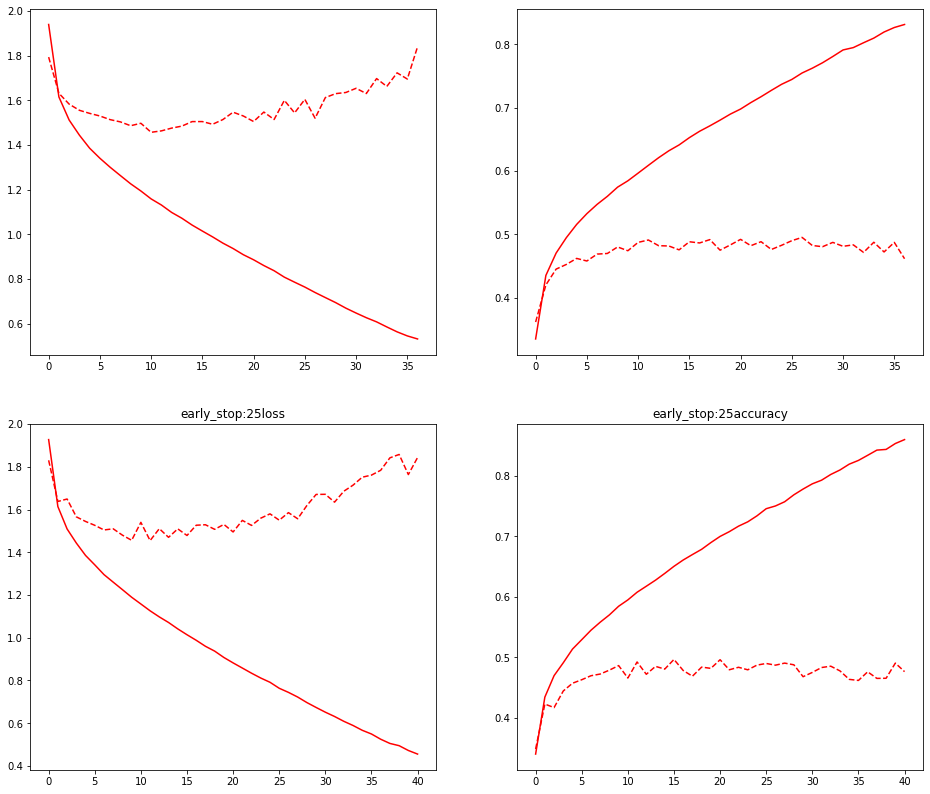

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,axes = plt.subplots(len(results),2)
fig.set_size_inches(16,14)
for row_index,names in enumerate(results):
    axes[row_index][0].plot(range(len(results[names]['val_loss'])),results[names]['val_loss'],'--',color = 'r')
    axes[row_index][0].plot(range(len(results[names]['loss'])),results[names]['loss'],'-',color = 'r')
    axes[row_index][1].plot(range(len(results[names]['val_accuracy'])),results[names]['val_accuracy'],'--',color = 'r')
    axes[row_index][1].plot(range(len(results[names]['accuracy'])),results[names]['accuracy'],'-',color = 'r')
axes[row_index][0].set_title(names + 'loss')
axes[row_index][1].set_title(names + 'accuracy')
    